# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: ExtraTrees Regressor
2. Accuracy Score: 99.50%
3. Cross Validation Score: 98.66%
4. Differential bt/w Accuracy and CV Score: 0.009
5. RMSE:0.4
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
     - 2.1:Import all necessary libraries
     - 2.2:Load Dataset
     - 2.3:Data Descriptive Analysis
     - 2.4:Observations
- Step 3: EXPLORATORY DATA ANALYSIS
     - 3.1:Normal Distribution Check(Univariate Analysis)
     - 3.2:Scatter Plot Check(Bivariate Analysis)
     - 3.3:Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis
     - 3.4:Outlier Check
     - 3.5:Skewness Check
- Step 4: DATA PREPROCESSING
     - 4.1:Removal of Duplicates and Unwanted Column
     - 4.2:Dropping of Features that strongly promotes multicollinearity(VIF)
     - 4.3:Removal of Outliers
     - 4.4:Transforming Data to Remove Skewness using Power transformation
     - 4.5:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
     - 5.1:Linear Regression
     - 5.2:KNeighbors Regressor
     - 5.3:Decision Tree Regressor
     - 5.4:RandomForest Regressor
     - 5.5:AdaBoost Regressor
     - 5.6:GradientBoosting Regressor
     - 5.7:XGBoost Regressor
     - 5.8:ExtraTrees Regressor
     - 5.9:Support Vector Regressor(SVR)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
     - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
     - 6.2:Conclusion on Best Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:MODEL SAVING

# PROBLEM STATEMENT(Advertising Sales Channel Prediction)

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv

# Domain Knowledge
This is critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement.

- radio channels tend to market carket car owners majorly
- The world is going digital, hence newspaper adverts tend to see less traction compared to online/social media
- TV adverts get more traction during morning, late evening and weekends

# Step 1 - ATTRIBUTES OF VARIABLES

1. TV - A system used for transmitting visual images and sound that are reproduced on screens, chiefly used to broadcast                 advertising programs about products which is geared towards increase in sales. 


2. radio - The transmission and reception of electromagnetic waves of radio frequency, especially those carrying advertising                sound messages about products which is geared towards increase in sales.


3. newspaper - A printed publication (usually issued daily or weekly) consisting of folded unstapled sheets and containing news,                and advertisements on products which geared towards increase in sales.


4. sales - This involves the exchange of a commodity for money.

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
import statsmodels.api as sm
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#checking the first five rows
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#checking the last five rows
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
#picking 4 random samples
df.sample(4)

,Unnamed: 0,TV,radio,newspaper,sales
7,8,120.2,19.6,11.6,13.2
5,6,8.7,48.9,75.0,7.2
194,195,149.7,35.6,6.0,17.3
12,13,23.8,35.1,65.9,9.2


# Step 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(200, 5)

In [7]:
#checking for nature of datatypes
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
#Checking data full description
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
#lets check the columns
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
#Checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [12]:
#Checking for null values
df.isnull().sum().sum()

0

# Step 2.4 - Observations


# The Dataset is made up of;
- 200 rows and 5 columns
- 3 features and 1 Target

# Description of Features:
- All the features have the following properties:
 - It has no null values
 - Its Datatypes are floating type
 - It is made up of Continous data
 - It will not require encoding since they are made up of numerical data

# About the Target/Label:
sales: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is a floating type
- It is made up of Continuos data


**Since the target is made up of a continuos data hence this is a REGRESSION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 - Normal Distribution Check - Univariate Analysis

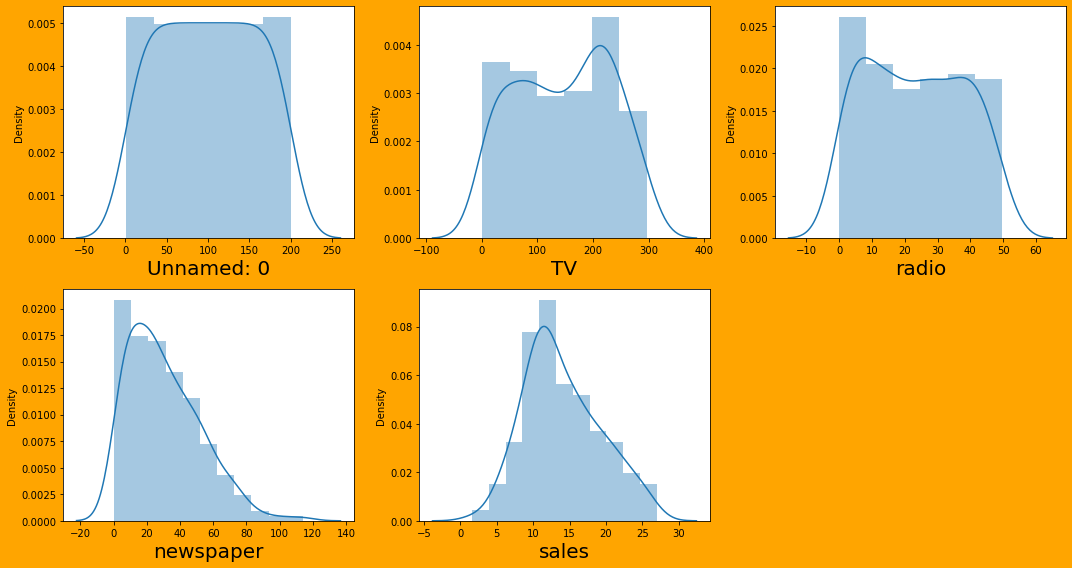

In [13]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='orange')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)#2,3 means arrange the graphs in 2-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 6
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot 
- We can see that All the features does not obey a normal distribution, the building blocks is not in tandem with a normalized curve
- The normal distribution of the 'Unnamed: 0' columns has no contribution to our Model Building and it will be dropped during     our Data Preprocessing analysis.
- The normal distribution of the sales columns also has no contribution to our Model Building since its the Target variable

# Step 3.2 - Scatter Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the features and the Label

In [14]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop(columns=['Unnamed: 0','sales'],axis=1)
features

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


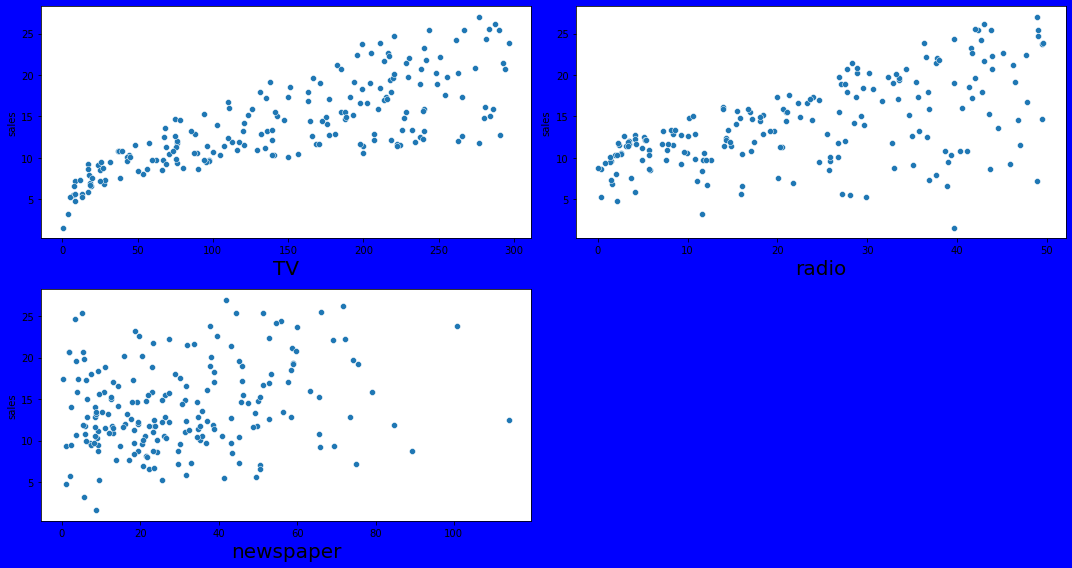

In [15]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=4:#since there are 3 features
        ax = plt.subplot(2,2,plotnumber)#2,2 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['sales'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 4
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a strong relationship between the features and the Label(Rings) except the 'newspaper' column

# Step 3.3 - Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [16]:
#checking for general correlation
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [17]:
#checking for correlation between each feature and Label
df.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

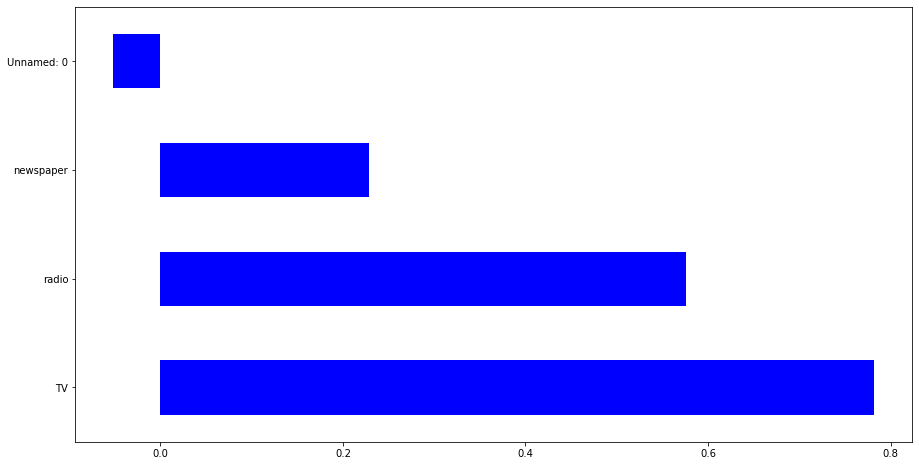

In [18]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

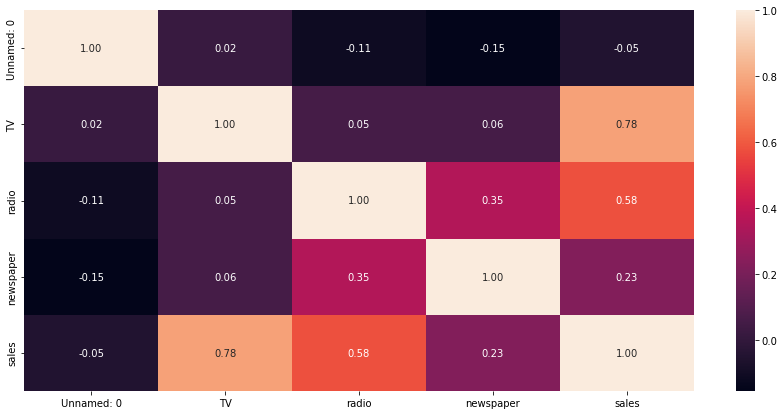

In [19]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

<function matplotlib.pyplot.show(close=None, block=None)>

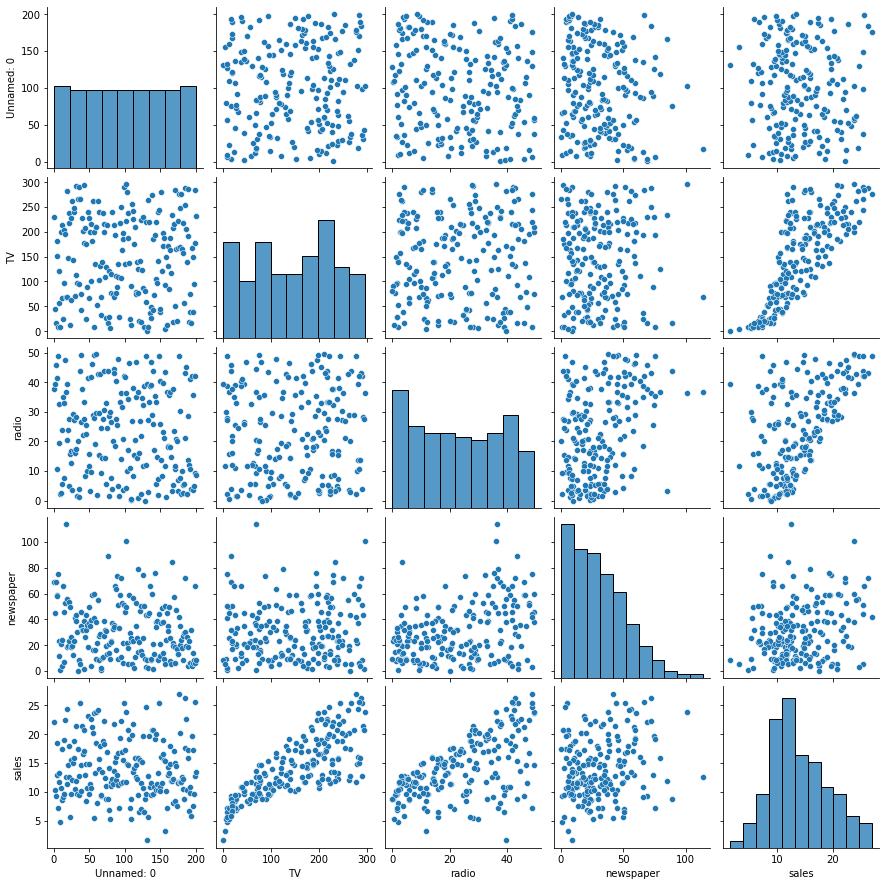

In [20]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

Hmmmm....we can see that most features DO NOT share a 'direct relationship' between each other! as the majority of the map-squares are not bright! But lets conlcude with our findings first:

In [21]:
df.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

Collinearity:
 - newspaper has a positive correlation of 22% with the target column which can be considered as a weak bond
 - radio has a positive correlation of 58% with the target column which can be considered as a good bond
 - TV has a positive correlation of 78% with the target column which can be considered as a good bond
 
 - Feature with Maximum correlation = 'TV'
 - Feature with Minimum correlation = 'newspaper'
 
Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features DOES NOT noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

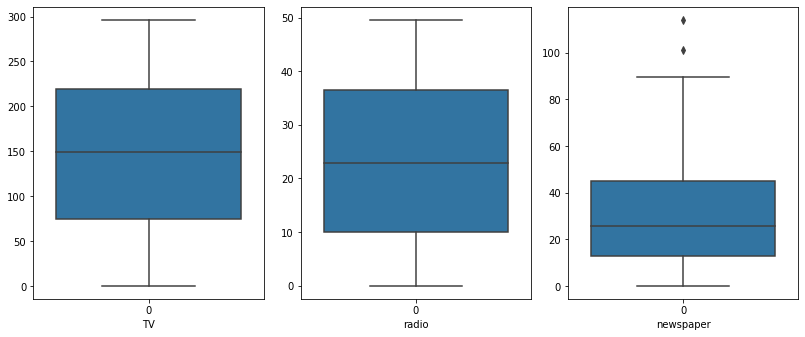

In [22]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if graph<=4:#this was made 8 just to allow for 4 spaces
        plt.subplot(2,4,graph)#2,4 means arrange the graphs in 2-rows and 2-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=features[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident ONLY the newspaper feature posses outliers, however this is subject to further analysis and reconfirmation using the zscore!

# Step 3.5 - Skewness Check

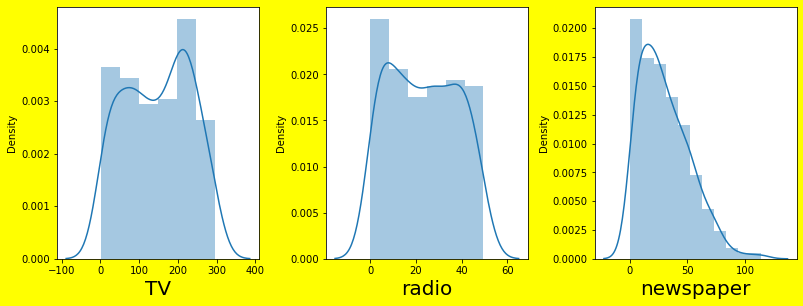

In [23]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=4:#since there are 4 features
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(features[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [24]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
features.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence ONLY the newspaper columns is having a skewness of 0.89:

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates and Unwanted Column

In [25]:
#Recheking shape of original data
df.shape

(200, 5)

In [26]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(200, 5)

It appears there are no duplicates since there is no change in the number of rows!

In [27]:
#Dropping the irrelevant columns - Unnamed: 0
df.drop('Unnamed: 0',axis=1, inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

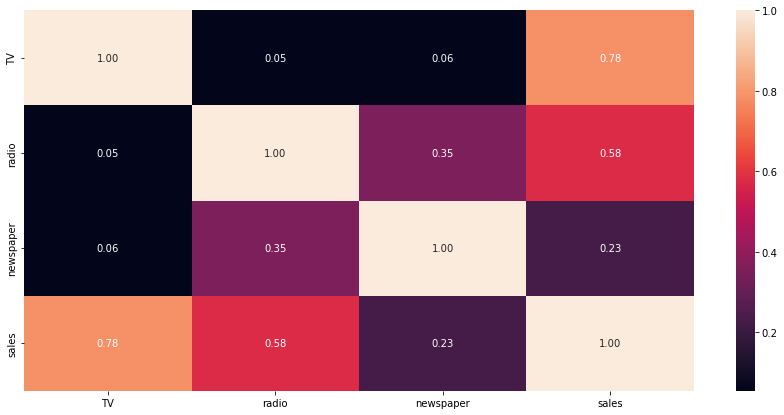

In [28]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that there is no visible correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [29]:
X=df.drop(columns=['sales'])
Y=df['sales']

In [30]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [31]:
#checking the shape
X_Scaled.shape

(200, 3)

Now we shall treat the above shape as an array of numbers(tuple) where 200 and 3 are the zeroth and first index respectively.

In [32]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [33]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(3) or (0,1,2), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 3. Now all the columns in X_Scaled which is (0,1,2) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [34]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘sales’ )
vif

,vif,Features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


From the above vif dataframe,we are setting a vif threshold of 5, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, MULTICOLLINEARITY PROBLEM DOES NOT EXIST!

# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

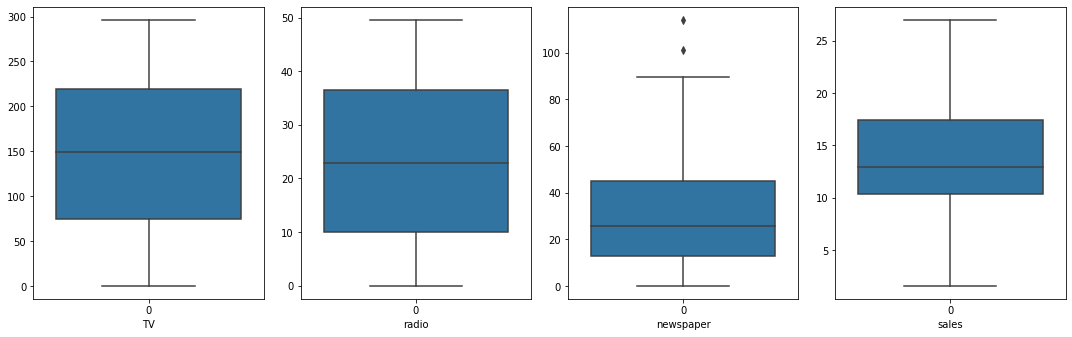

In [38]:
#rechecking for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=4:#this was made 8 just to allow for 4 spaces
        plt.subplot(2,4,graph)#2,4 means arrange the graphs in 2-rows and 2-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

Once again its visible we only have outlier issues in the newspaper columns! Now lets go ahead and remove them using zscore!

In [39]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [40]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(200, 4)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [41]:
#index number
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [42]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (200, 4)
New DataFrame (198, 4)
total_dropped_rows 2


A Total of 2 outliers have been removed! Lets move on! Data is looking great!

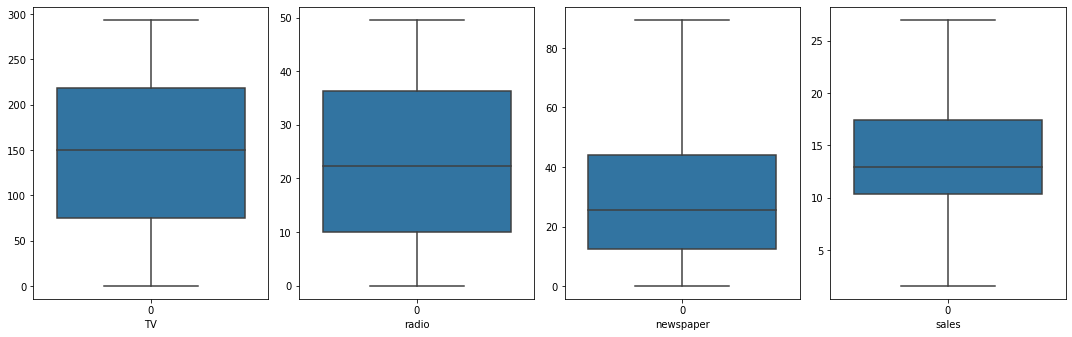

In [45]:
#rechecking for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=4:#this was made 8 just to allow for 4 spaces
        plt.subplot(2,4,graph)#2,4 means arrange the graphs in 2-rows and 2-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above you can see all real alien(outliers) data points have been removed from the newspaper column!

In [46]:
#Checking the new dataframe with non-outliers
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Now we need to reset our data having removed outliers.....

In [47]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


In [48]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


# Step 4.4 - Transforming Data to Remove Skewness using Power transformation

In [44]:
#rechecking for skewness...
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

- Since we don't apply skewness removal on target data, we need to create a sub data frame that does not include the sales         column

- Using a skewness threshold of +/-0.5, from the skewness data, only the newspaper column has skewness in its data. So lets go     ahead and remove them!

In [49]:
#Extracting only continuos data and storing in cont_features
cont_features= ['TV', 'radio', 'newspaper']
cont_features=df_new[cont_features]
cont_features

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
193,38.2,3.7,13.8
194,94.2,4.9,8.1
195,177.0,9.3,6.4
196,283.6,42.0,66.2


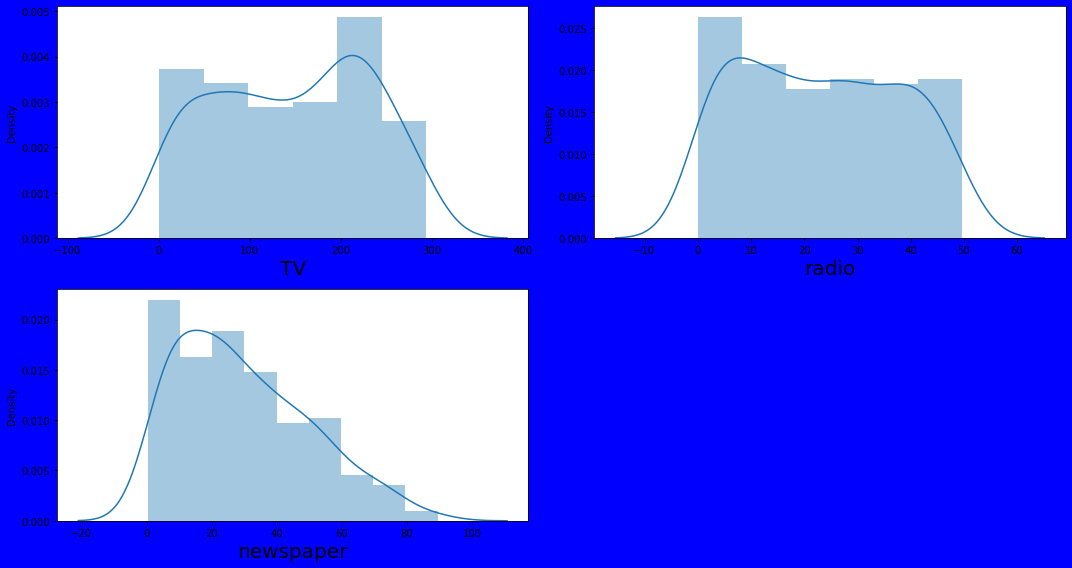

In [50]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in cont_features:#triggering your for loop
    if plotnumber<=4:#since there are 6 features
        ax = plt.subplot(2,2,plotnumber)#2,2 means arrange the graphs in 2-rows and 2-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(cont_features[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 4
plt.tight_layout()#This is just to show you data in a compact form. 

A good Pre-Power Transformation procedure is to ensure that there are no zero values in the data stored in 'cont_features' because from domain knowledge, none of the data values in each features(except Sex column) should be zero!

In [51]:
#Firstly, replacing zero values(if any) in the TV, radio and newspaper columns with the mean (since its made up of continuos data)
df_new['TV']=df_new['TV'].replace(0,df_new['TV'].mean())
df_new['radio']=df_new['radio'].replace(0,df_new['radio'].mean())
df_new['newspaper']=df_new['newspaper'].replace(0,df_new['newspaper'].mean())

Let lets go ahead and apply Power Transformation!

In [56]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [53]:
#extracting the columns that are skewed
data=['newspaper']

In [54]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [55]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,1.604196,22.1
1,44.5,39.3,0.831044,10.4
2,17.2,45.9,1.607052,9.3
3,151.5,41.3,1.283768,18.5
4,180.8,10.8,1.280622,12.9
...,...,...,...,...
193,38.2,3.7,-0.687435,7.6
194,94.2,4.9,-1.146090,9.7
195,177.0,9.3,-1.314437,12.8
196,283.6,42.0,1.517395,25.5


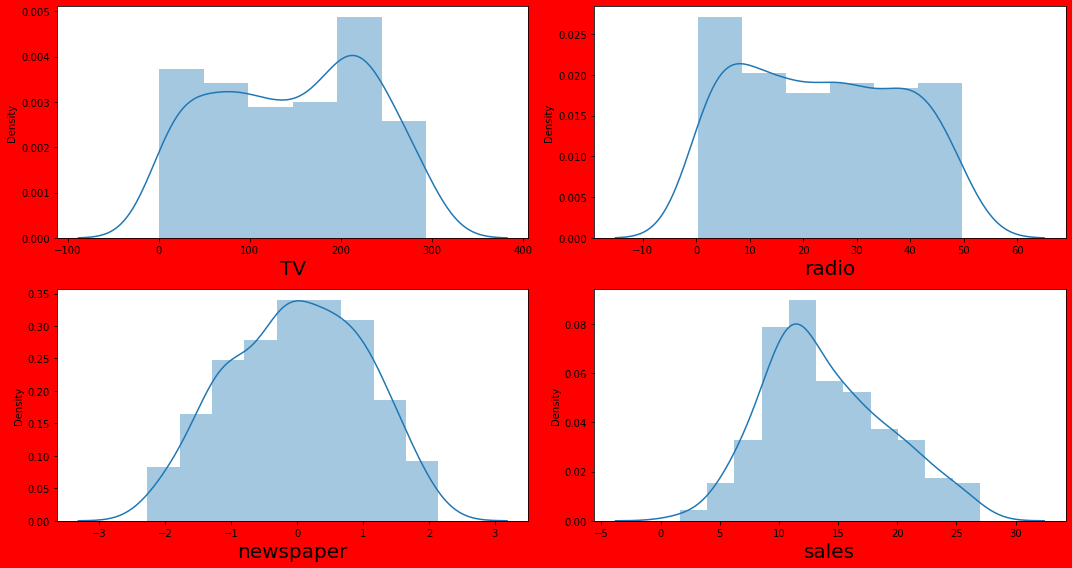

In [57]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=4:#since there are 6 features
        ax = plt.subplot(2,2,plotnumber)#2,2 means arrange the graphs in 2-rows and 2-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 4
plt.tight_layout()#This is just to show you data in a compact form. 

In [58]:
#rechecking for skewness
df_new.skew()

TV          -0.082332
radio        0.112729
newspaper   -0.101288
sales        0.407130
dtype: float64

From the above you can see the newspaper skewness is now within the threshold of +/-0.5 which was chosen earlier!

From the above we can see that skewness has been removed!

NOTE:
- Only the newspaper columns was considered for skewness removal
- The sales column is not considered for skewness since its the Target data

# Step 4.5 - Seperating the datasets into X and Y variables

In [59]:
#seperation
X=df_new.drop(columns=['sales'])
Y=df_new['sales']

# Transforming data into standard normal distribution

In [60]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.97869734,  0.9877633 ,  1.6041965 ],
       [-1.19901165,  1.08957798,  0.83104401],
       [-1.51933199,  1.5375626 ,  1.60705249],
       [ 0.05645636,  1.2253309 ,  1.28376774],
       [ 0.40024339, -0.84490105,  1.28062154],
       [-1.61906543,  1.74119197,  1.76610727],
       [-1.04647815,  0.64838101, -0.10205346],
       [-0.31079737, -0.24758823, -0.84968895],
       [-1.62023876, -1.43542623, -2.09866461],
       [ 0.62317696, -1.401488  , -0.22649933],
       [-0.94557138, -1.18428334, -0.06553382],
       [ 0.79800381,  0.05106819, -1.59608414],
       [-1.44189191,  0.80449686,  1.50859232],
       [-0.57714432, -1.06210571, -1.23269654],
       [ 0.67363035,  0.65516866,  0.86367455],
       [ 0.57155024,  1.65974023,  1.1026083 ],
       [ 1.58061798,  1.10994092,  1.19771741],
       [-0.90919801, -0.18649941, -0.39458775],
       [ 0.0071763 ,  0.04428054, -0.346834  ],
       [ 0.84141719,  0.30221108,  1.11921444],
       [ 1.06435076, -1.23179686, -0.102

What standard scaler does is to bring mean to zero and standard deviation to 1

In [61]:
#reconfirming that mean is 0
X_Scaled.mean()

-7.476249324075129e-17

In [62]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Step 5 - MODEL BUILDING

# Step 5.1 - Linear Regression

# Best Random State

In [76]:
#Using LinearRegression to get the best Random state
lm=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  91.05 and 89.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.17 and 1.32 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  2.42 and 1.32 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1.55 and 1.15 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  89.16 and 89.45 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.23 and 1.29 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  2.82 and 1.29 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.68 and 1.13 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  83.85 and 91.05 respectively
At random state of :-  2 the mean absolute error of 

The best accuracy is 94.72% at random state 24

We have found best_random state value as 24. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=24,test_size=0.20)

In [64]:
x_train.shape

(158, 3)

In [65]:
x_test.shape

(40, 3)

In [66]:
y_train.shape

(158,)

In [67]:
y_test.shape

(40,)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [68]:
lm=LinearRegression()#Initializing...
lm.fit(x_train,y_train)#Training...
pred_test=lm.predict(x_test)#Prediciting using test data...
pred_train=lm.predict(x_train)#Prediciting using training data...
Test_Accuracy_lm= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_lm= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_lm= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_lm= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_lm= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_lm= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_lm= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_lm= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_lm)#printing mean absolute error
print("Test_MSE ", Test_mse_lm)#printing mean squared error
print("Test_RMSE ", Test_rmse_lm)#printing root mean squared error

Test_Accuracy  94.84
Test_MAE  0.929742744186256
Test_MSE  1.3287129853812916
Test_RMSE  1.1526981328089725


LinearRegression is producing average accuracy 94.84% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [69]:
#Validation accuracy
vac=cross_val_score(lm,X,Y,cv=5)
CV_Score_lm=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lm)

[0.8785798  0.91664694 0.92407556 0.80874735 0.89595341]
Cross Validation Score is  0.8848006112623652


# Difference between Accuracy Score and Cross Validation Score

In [70]:
Test_Accuracy_lm

0.9483628860021859

In [71]:
CV_Score_lm

0.8848006112623652

In [72]:
lm_Acc_vs_CV_Score=np.abs(Test_Accuracy_lm-CV_Score_lm)
print("Difference between Accuracy and Cross Validation Score = ",lm_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06356227473982068


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.064) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.2 - KNN Regressor

# Best Random State

In [89]:
#Using KNeighbors Regressor to get the best Random state
knn=KNeighborsRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  95.63 and 94.91 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.76 and 0.79 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1.18 and 0.79 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1.09 and 0.89 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  96.03 and 95.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.78 and 0.79 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1.03 and 0.79 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.02 and 0.89 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  91.52 and 96.4 respectively
At random state of :-  2 the mean absolute error of T

The best accuracy is 97.35% at random state 3

We have found best_random state value as 3. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=3,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [74]:
knn=KNeighborsRegressor()#Initializing...
knn.fit(x_train,y_train)#Training...
pred_test=knn.predict(x_test)#Prediciting using test data...
pred_train=knn.predict(x_train)#Prediciting using training data...
Test_Accuracy_knn= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_knn= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_knn= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_knn= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_knn= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_knn= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_knn= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_knn= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_knn)#printing mean absolute error
print("Test_MSE ", Test_mse_knn)#printing mean squared error
print("Test_RMSE ", Test_rmse_knn)#printing root mean squared error

Test_Accuracy  96.23
Test_MAE  0.7440000000000003
Test_MSE  1.0004199999999996
Test_RMSE  1.0002099779546292


KNeighbors is producing average accuracy 96.23% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [75]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[0.95972342 0.96417334 0.96201538 0.92504883 0.94058029]
Cross Validation Score is  0.9503082517402317


# Difference between Accuracy Score and Cross Validation Score

In [76]:
Test_Accuracy_knn

0.9622764521946359

In [77]:
CV_Score_knn

0.9503082517402317

In [78]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.011968200454404165


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.011) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.3 - Decision Tree Regressor

In [97]:
#Using Decision Tree Regressor to get the best Random state
dt=DecisionTreeRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  95.04 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.92 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1.34 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1.16 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  94.81 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.88 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1.35 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.16 and 0.0 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  95.47 and 100.0 respectively
At random state of :-  2 the mean absolute error of Testi

The best accuracy is 97.95% at random state 3

We have found best_random state value as 3. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [86]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=3,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [87]:
dt=KNeighborsRegressor()#Initializing...
dt.fit(x_train,y_train)#Training...
pred_test=dt.predict(x_test)#Prediciting using test data...
pred_train=dt.predict(x_train)#Prediciting using training data...
Test_Accuracy_dt= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_dt= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_dt= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_dt= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_dt= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_dt= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_dt= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_dt= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_dt)#printing mean absolute error
print("Test_MSE ", Test_mse_dt)#printing mean squared error
print("Test_RMSE ", Test_rmse_dt)#printing root mean squared error

Test_Accuracy  96.23
Test_MAE  0.7440000000000003
Test_MSE  1.0004199999999996
Test_RMSE  1.0002099779546292


Decision Tree is producing average accuracy 96.23% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [88]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.95972342 0.96417334 0.96201538 0.92504883 0.94058029]
Cross Validation Score is  0.9503082517402317


# Difference between Accuracy Score and Cross Validation Score

In [89]:
Test_Accuracy_dt

0.9622764521946359

In [90]:
CV_Score_dt

0.9503082517402317

In [91]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.011968200454404165


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.012) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.4 - RandomForest Regressor

# Best Random State

In [125]:
#Using RandomForest Regressor to get the best Random state
rf=RandomForestRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")


At random state of :- 0 Testing Accuracy and Training Accuracy are:-  97.94 and 99.69 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.59 and 0.21 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.55 and 0.21 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.74 and 0.46 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  98.2 and 99.67 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.56 and 0.22 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.47 and 0.22 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.68 and 0.47 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  97.17 and 99.71 respectively
At random state of :-  2 the mean absolute error of 

The best accuracy is 98.15% at random state 24

We have found best_random state value as 24. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [98]:
#using the random state of 81
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=24,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [100]:
rf=LinearRegression()#Initializing...
rf.fit(x_train,y_train)#Training...
pred_test=rf.predict(x_test)#Prediciting using test data...
pred_train=rf.predict(x_train)#Prediciting using training data...
Test_Accuracy_rf= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_rf= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_rf= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_rf= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_rf= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_rf= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_rf= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_rf= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_rf)#printing mean absolute error
print("Test_MSE ", Test_mse_rf)#printing mean squared error
print("Test_RMSE ", Test_rmse_rf)#printing root mean squared error

Test_Accuracy  94.84
Test_MAE  0.929742744186256
Test_MSE  1.3287129853812916
Test_RMSE  1.1526981328089725


RandomForest is producing fair accuracy = 94.84%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [101]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.8785798  0.91664694 0.92407556 0.80874735 0.89595341]
Cross Validation Score is  0.8848006112623652


# Difference between Accuracy Score and Cross Validation Score

In [102]:
Test_Accuracy_rf

0.9483628860021859

In [103]:
CV_Score_rf

0.8848006112623652

In [104]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06356227473982068


From the above you can see that difference between Accuracy and Cross Validation score is low (0.064) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.5 - AdaBoost Regressor

# Best Random State 

In [188]:
#Using AdaBoost Regressor to get the best Random state
ada=AdaBoostRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  95.64 and 97.72 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.87 and 0.64 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1.18 and 0.64 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1.08 and 0.8 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  95.05 and 97.44 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.98 and 0.7 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1.28 and 0.7 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.13 and 0.84 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  94.78 and 98.07 respectively
At random state of :-  2 the mean absolute error of Te

The best accuracy is 97.81% at random state 74

We have found best_random state value as 74. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=74,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [106]:
ada=AdaBoostRegressor()#Initializing...
ada.fit(x_train,y_train)#Training...
pred_test=ada.predict(x_test)#Prediciting using test data...
pred_train=ada.predict(x_train)#Prediciting using training data...
Test_Accuracy_ada= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ada= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ada= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ada= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ada= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ada= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ada= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ada= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ada)#printing mean absolute error
print("Test_MSE ", Test_mse_ada)#printing mean squared error
print("Test_RMSE ", Test_rmse_ada)#printing root mean squared error

Test_Accuracy  97.37
Test_MAE  0.7340027467217041
Test_MSE  1.0053740937673208
Test_RMSE  1.0026834464412588


AdaBoost is producing good accuracy = 97.37%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [107]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.95841243 0.97199514 0.95318994 0.92626939 0.95032703]
Cross Validation Score is  0.9520387862693115


# Difference between Accuracy Score and Cross Validation Score

In [108]:
Test_Accuracy_ada

0.9736812892215945

In [109]:
CV_Score_ada

0.9520387862693115

In [110]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.021642502952282983


From the above you can see that difference between Accuracy and Cross Validation score is low (0.022) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.6 - GradientBoosting Regressor

# Best Random State

In [195]:
#Using GradientBoosting to get the best Random state
gb=GradientBoostingRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  98.17 and 99.87 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.54 and 0.14 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.5 and 0.14 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.7 and 0.38 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  98.59 and 99.89 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.48 and 0.13 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.37 and 0.13 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.61 and 0.36 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  97.15 and 99.9 respectively
At random state of :-  2 the mean absolute error of Te

The best accuracy is 99.10% at random state 40

We have found best_random state value as 40. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [111]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=40,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [112]:
gb=GradientBoostingRegressor()#Initializing...
gb.fit(x_train,y_train)#Training...
pred_test=gb.predict(x_test)#Prediciting using test data...
pred_train=gb.predict(x_train)#Prediciting using training data...
Test_Accuracy_gb= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_gb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_gb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_gb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_gb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_gb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_gb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_gb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_gb)#printing mean absolute error
print("Test_MSE ", Test_mse_gb)#printing mean squared error
print("Test_RMSE ", Test_rmse_gb)#printing root mean squared error

Test_Accuracy  99.01
Test_MAE  0.40720289513039115
Test_MSE  0.24765636065050192
Test_RMSE  0.49765084210769894


GradientBoosting is producing good accuracy = 99.01%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [113]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.97802189 0.98643331 0.96636396 0.95461168 0.98621468]
Cross Validation Score is  0.9743291022869837


# Difference between Accuracy Score and Cross Validation Score

In [114]:
Test_Accuracy_gb

0.9900886684944162

In [115]:
CV_Score_gb

0.9743291022869837

In [116]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.015759566207432574


From the above you can see that difference between Accuracy and Cross Validation score is low (0.016) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.7 - XGBoost Regressor

# Best Random State

In [202]:
#Using XGBoost Regressor to get the best Random state
xgb=XGBRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  98.06 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.56 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.52 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.72 and 0.03 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  98.04 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.56 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.51 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.71 and 0.04 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  96.77 and 100.0 respectively
At random state of :-  2 the mean absolute error of Tes

The best accuracy is 98.94% at random state 74

We have found best_random state value as 74. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [117]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=74,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [118]:
xgb=XGBRegressor()#Initializing...
xgb.fit(x_train,y_train)#Training...
pred_test=xgb.predict(x_test)#Prediciting using test data...
pred_train=xgb.predict(x_train)#Prediciting using training data...
Test_Accuracy_xgb=(metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_xgb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_xgb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_xgb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_xgb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_xgb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_xgb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_xgb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_xgb)#printing mean absolute error
print("Test_MSE ", Test_mse_xgb)#printing mean squared error
print("Test_RMSE ", Test_rmse_xgb)#printing root mean squared error

Test_Accuracy  98.89
Test_MAE  0.545161337852478
Test_MSE  0.42446477275165717
Test_RMSE  0.6515096106364489


XGBoost is producing good accuracy = 98.89%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [119]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.97514121 0.97942987 0.95031288 0.95042066 0.97767261]
Cross Validation Score is  0.9665954470524365


# Difference between Accuracy Score and Cross Validation Score

In [120]:
Test_Accuracy_xgb

0.9888883494622273

In [121]:
CV_Score_xgb

0.9665954470524365

In [122]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.02229290240979076


From the above you can see that difference between Accuracy and Cross Validation score is low (0.022) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.8 - ExtraTrees Regressor

# Best Random State

In [209]:
#Using ExtraTree Regressor to get the best Random state
ex=ExtraTreesRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  99.31 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.34 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.19 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.43 and 0.02 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  98.89 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.45 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.29 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.54 and 0.01 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  97.79 and 100.0 respectively
At random state of :-  2 the mean absolute error of Tes

The best accuracy is 99.53% at random state 192

We have found best_random state value as 192. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [123]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=192,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [124]:
ex=ExtraTreesRegressor()#Initializing...
ex.fit(x_train,y_train)#Training...
pred_test=ex.predict(x_test)#Prediciting using test data...
pred_train=ex.predict(x_train)#Prediciting using training data...
Test_Accuracy_ex= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ex= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ex= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ex= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ex= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ex= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ex= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ex= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ex)#printing mean absolute error
print("Test_MSE ", Test_mse_ex)#printing mean squared error
print("Test_RMSE ", Test_rmse_ex)#printing root mean squared error

Test_Accuracy  99.5
Test_MAE  0.3019249999999988
Test_MSE  0.1617212249999998
Test_RMSE  0.4021457758077285


ExtraTress  is producing good accuracy = 99.50%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [125]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.99145822 0.99206113 0.98946443 0.96347739 0.98942569]
Cross Validation Score is  0.985177370298431


# Difference between Accuracy Score and Cross Validation Score

In [126]:
Test_Accuracy_ex

0.9949544255591727

In [127]:
CV_Score_ex

0.985177370298431

In [128]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.009777055260741685


From the above you can see that difference between Accuracy and Cross Validation score is low (0.01) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.9 - Support Vector Regressor(SVR)

# Best Random State

In [216]:
#Using Support Vector Regressor to get the best Random state
sv=SVR()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  91.45 and 91.78 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.93 and 0.83 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  2.31 and 0.83 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1.52 and 0.91 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  94.43 and 91.88 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.72 and 0.85 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1.45 and 0.85 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.2 and 0.92 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  88.75 and 92.8 respectively
At random state of :-  2 the mean absolute error of T

The best accuracy is 97.06% at random state 63

We have found best_random state value as 63. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [129]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=63,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [130]:
sv=SVR()#Initializing...
sv.fit(x_train,y_train)#Training...
pred_test=sv.predict(x_test)#Prediciting using test data...
pred_train=sv.predict(x_train)#Prediciting using training data...
Test_Accuracy_sv= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_sv= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_sv= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_sv= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_sv= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_sv= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_sv= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_sv= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_sv)#printing mean absolute error
print("Test_MSE ", Test_mse_sv)#printing mean squared error
print("Test_RMSE ", Test_rmse_sv)#printing root mean squared error

Test_Accuracy  96.98
Test_MAE  0.6527750889990342
Test_MSE  0.7455141183168388
Test_RMSE  0.8634315944629538


Support Vector is producing good accuracy = 96.98%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [131]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.8441246  0.86209973 0.8308861  0.83562469 0.77467593]
Cross Validation Score is  0.8294822118498233


# Difference between Accuracy Score and Cross Validation Score

In [132]:
Test_Accuracy_sv

0.9697835927786246

In [133]:
CV_Score_sv

0.8294822118498233

In [134]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.1403013809288013


From the above you can see that difference between Accuracy and Cross Validation score is low(0.140) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 9 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [135]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['Linear Regression','KNeigbors Regressor','DecisionTree Regressor','Random Forest Regressor','Ada Boosting Regressor','Gradient Boosting Regressor', 'XgBoost','Extra Trees Regressor','SVR'],'Accuracy_Score' : [Test_Accuracy_lm,Test_Accuracy_knn,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lm,CV_Score_knn,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lm_Acc_vs_CV_Score,knn_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score],'MAE':[Test_mae_lm,Test_mae_knn,Test_mae_dt,Test_mae_rf,Test_mae_ada,Test_mae_gb,Test_mae_xgb,Test_mae_ex,Test_mae_sv],'MSE':[Test_mse_lm,Test_mse_knn,Test_mse_dt,Test_mse_rf,Test_mse_ada,Test_mse_gb,Test_mse_xgb,Test_mse_ex,Test_mse_sv],'RMSE':[Test_rmse_lm,Test_rmse_knn,Test_rmse_dt,Test_rmse_rf,Test_rmse_ada,Test_rmse_gb,Test_rmse_xgb,Test_rmse_ex,Test_rmse_sv]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
0,Linear Regression,0.948363,0.884801,0.063562,0.929743,1.328713,1.152698
1,KNeigbors Regressor,0.962276,0.950308,0.011968,0.744000,1.000420,1.000210
2,DecisionTree Regressor,0.962276,0.950308,0.011968,0.744000,1.000420,1.000210
3,Random Forest Regressor,0.948363,0.884801,0.063562,0.929743,1.328713,1.152698
4,Ada Boosting Regressor,0.973681,0.952039,0.021643,0.734003,1.005374,1.002683
5,Gradient Boosting Regressor,0.990089,0.974329,0.015760,0.407203,0.247656,0.497651
6,XgBoost,0.988888,0.966595,0.022293,0.545161,0.424465,0.651510
7,Extra Trees Regressor,0.994954,0.985177,0.009777,0.301925,0.161721,0.402146
8,SVR,0.969784,0.829482,0.140301,0.652775,0.745514,0.863432


In [136]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
5,Gradient Boosting Regressor,100.0,98.0,0.015760,0.407203,0.247656,0.497651
7,Extra Trees Regressor,100.0,99.0,0.009777,0.301925,0.161721,0.402146
6,XgBoost,99.0,97.0,0.022293,0.545161,0.424465,0.651510
4,Ada Boosting Regressor,98.0,96.0,0.021643,0.734003,1.005374,1.002683
1,KNeigbors Regressor,97.0,96.0,0.011968,0.744000,1.000420,1.000210
2,DecisionTree Regressor,97.0,96.0,0.011968,0.744000,1.000420,1.000210
8,SVR,97.0,83.0,0.140301,0.652775,0.745514,0.863432
0,Linear Regression,95.0,89.0,0.063562,0.929743,1.328713,1.152698
3,Random Forest Regressor,95.0,89.0,0.063562,0.929743,1.328713,1.152698


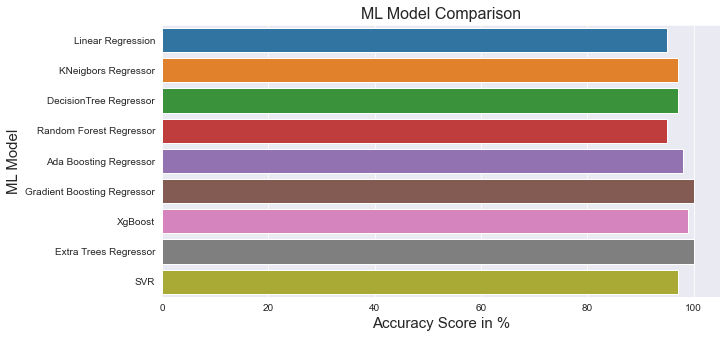

In [137]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that Extratrees(99.50%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so lets consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [138]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
7,Extra Trees Regressor,100.0,99.0,0.009777,0.301925,0.161721,0.402146
1,KNeigbors Regressor,97.0,96.0,0.011968,0.744000,1.000420,1.000210
2,DecisionTree Regressor,97.0,96.0,0.011968,0.744000,1.000420,1.000210
5,Gradient Boosting Regressor,100.0,98.0,0.015760,0.407203,0.247656,0.497651
4,Ada Boosting Regressor,98.0,96.0,0.021643,0.734003,1.005374,1.002683
6,XgBoost,99.0,97.0,0.022293,0.545161,0.424465,0.651510
0,Linear Regression,95.0,89.0,0.063562,0.929743,1.328713,1.152698
3,Random Forest Regressor,95.0,89.0,0.063562,0.929743,1.328713,1.152698
8,SVR,97.0,83.0,0.140301,0.652775,0.745514,0.863432


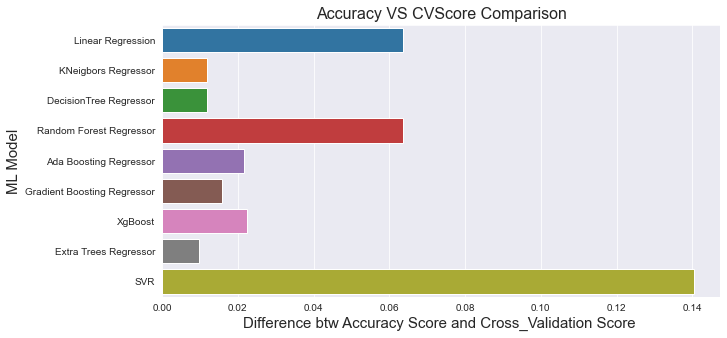

In [139]:
#A more clearer visualization.....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'ML_Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

# From the above we can see the Model with least difference is STILL ExtraTrees Regressor!

# Step 6.2 - Conclusion on Best Choice of Model

From the above we can see:
 - The Model with least difference(0.008) between Accuracy Score(r2 score) and Cross Validation Score is EXTRATREES REGRESSOR!
 
 - It has the lowest Root Mean Square Error(RMSE): 0.4

In [140]:
#Checking the parameters
x_train_sm = sm.add_constant(x_train)
ex = sm.OLS(y_train,x_train_sm).fit()
ex.params

const    13.939845
x1        4.033633
x2        2.687510
x3        0.089659
dtype: float64

In [141]:
#Now lets the the OLS Regression result
print(ex.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     434.9
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           6.09e-75
Time:                        13:39:51   Log-Likelihood:                -308.15
No. Observations:                 158   AIC:                             624.3
Df Residuals:                     154   BIC:                             636.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9398      0.137    101.610      0.0

# Hence Optimum Machine Model Chosen = EXTRATREES REGRESSION MODEL!

# Step 7 - HYPERPARAMETER TUNNING
- Since our chosen model has an accuracy of 99.5% which is excellent, its needless to enagage in Hyperparameter tunning as it      will consume time in searching for the best params!
 
So lets go ahead and save the model

# Step 8 - MODEL SAVING

In [149]:
filename='Machine_Model_Project_Advertising'
pickle.dump(ex,open(filename,'wb'))